In [47]:
import pandas as pd
import matplotlib
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.1)
sns.set_palette('viridis')
from glob import glob
from pathlib import Path
import os
metric_nice = {
#     'auditor_fn_violation':'FN Violation',
#     'auditor_fp_violation':'FP Violation',
    'accuracy':'1-Accuracy',
    'auc_prc':'AUPRC',
    'ave_precision_score':'APS',
    'auc_roc':'1-AUROC',
    'subgroup_fpr':'Subgroup FP',
    'subgroup_fnr':'Subgroup FN',
}
hv_nice = {}
for k1,v1 in metric_nice.items():
    for k2,v2 in metric_nice.items():
        hv_nice.update({f'hv({k1}:{k2})': f'HV({v1}, {v2})'})
Order = [
    'fomo_nsga2_lr_fnr',
    'fomo_flex_lr_fnr',
    'fomo_lex_lr_fnr',
    'fomo_nsga2_xgb_fnr',
    'fomo_flex_xgb_fnr',
    'fomo_lex_xgb_fnr',
    
    'fomo_nsga2_lr_fnr_linear',
    'fomo_flex_lr_fnr_linear',
    'fomo_lex_lr_fnr_linear',
    'fomo_nsga2_xgb_fnr_linear',
    'fomo_flex_xgb_fnr_linear',   
    'fomo_lex_xgb_fnr_linear',
    
    'fomo_nsga2_lr_fnr_mlp',   
    'fomo_flex_lr_fnr_mlp',
    'fomo_lex_lr_fnr_mlp',
    'fomo_nsga2_xgb_fnr_mlp',      
    'fomo_flex_xgb_fnr_mlp',      
    'fomo_lex_xgb_fnr_mlp'
]
method_nice = {
    'fomo_nsga2_lr_fnr':'NSGA2-LR',
    'fomo_nsga2_lr_fpr':'NSGA2-LR',
    'fomo_nsga2_lr_fnr_linear':'NSGA2-LR-LIN',
    'fomo_nsga2_lr_fpr_linear':'NSGA2-LR-LIN',
    'fomo_nsga2_lr_fnr_mlp':'NSGA2-LR-NN',
    'fomo_nsga2_lr_fpr_mlp':'NSGA2-LR-NN',
    'fomo_nsga2_xgb_fnr':'NSGA2-RF',
    'fomo_nsga2_xgb_fpr':'NSGA2-RF',
    'fomo_nsga2_xgb_fnr_linear':'NSGA2-RF-LIN',
    'fomo_nsga2_xgb_fpr_linear':'NSGA2-RF-LIN',
    'fomo_nsga2_xgb_fnr_mlp':'NSGA2-RF-NN',
    'fomo_nsga2_xgb_fpr_mlp':'NSGA2-RF-NN',
    'fomo_flex_lr_fnr':'FLEX+NSGA2-LR',
    'fomo_flex_xgb_fnr':'FLEX+NSGA2-RF',
    'fomo_flex_lr_fnr_linear':'FLEX+NSGA2-LR-LIN',
    'fomo_flex_lr_fnr_mlp':'FLEX+NSGA2-LR-NN',
    'fomo_flex_xgb_fnr_linear':'FLEX+NSGA2-RF-LIN',
    'fomo_flex_xgb_fnr_mlp':'FLEX+NSGA2-RF-NN',
    'fomo_lex_lr_fnr':'FLEX-LR',
    'fomo_lex_xgb_fnr':'FLEX-RF',
    'fomo_lex_lr_fnr_linear':'FLEX-LR-LIN',
    'fomo_lex_lr_fnr_mlp':'FLEX-LR-NN',
    'fomo_lex_xgb_fnr_linear':'FLEX-RF-LIN',
    'fomo_lex_xgb_fnr_mlp':'FLEX-RF-NN'
}

rdirs = [
#      '../results/Run_16/adultT',
      '../results/Run_17/normalized_hvs',
    #   '../results/Run_17/synthT',
    #   '../results/Run_17/synthetic1T',
    # '../results/Run_16/synthetic1N',
    #  '../results/Run_16/synthetic1W',
]
figdir = 'figures/figs17/hypervolume_comparison'
os.makedirs(figdir, exist_ok=True)

# load data 

In [48]:
# read csv files containing hypervolume data
frames = []
for rdir in rdirs:
    for f in Path(rdir).glob('*.csv'):
        df = pd.read_csv(f)
        if 'synthT5000' in str(f):
            df['dataset'] = 'synthT5000'
        if 'synthetic1T' in str(f):
            df['dataset'] = 'synthetic1T'
        if 'synthetic1W' in str(f):
            df['dataset'] = 'synthetic1W'
        # if 'adultR2' in str(f):
        #     df['dataset'] = 'adultR2'
        frames.append(df)
# convert train column to 'train', 'test'
df_all = pd.concat(frames)
# #df_all = frames
for m, dfgm in df_all.groupby('method'):
    for d, dfgmd in dfgm.groupby('dataset'):
        print('# results for',m,'on',d,':',len(dfgmd))
df_all['fold'] = df_all['train'].apply(lambda x: 'train' if x else 'test')
print(df_all.method.unique())
print('seeds (',df_all.seed.nunique(),'):',','.join([str(i) for i in df_all.seed.unique()]))
df_all = df_all.loc[df_all.method.isin(Order)]
df_all['method_nice'] = df_all['method'].apply(lambda x: method_nice[x])
#df_all = df_all[df_all['dataset'] != 'mimic4']
#df_all = df_all[df_all['dataset'] != 'adultR2']
df_train = df_all[df_all.fold=='train']
df_test = df_all[df_all.fold=='test']

# results for fomo_flex_lr_fnr on synthT : 400
# results for fomo_flex_lr_fnr on synthetic1T : 400
# results for fomo_flex_lr_fnr_linear on synthT : 400
# results for fomo_flex_lr_fnr_linear on synthetic1T : 400
# results for fomo_flex_lr_fnr_mlp on synthT : 400
# results for fomo_flex_lr_fnr_mlp on synthetic1T : 400
# results for fomo_flex_xgb_fnr on synthT : 400
# results for fomo_flex_xgb_fnr on synthetic1T : 400
# results for fomo_flex_xgb_fnr_linear on synthT : 400
# results for fomo_flex_xgb_fnr_linear on synthetic1T : 400
# results for fomo_flex_xgb_fnr_mlp on synthT : 400
# results for fomo_flex_xgb_fnr_mlp on synthetic1T : 400
# results for fomo_lex_lr_fnr on synthT : 400
# results for fomo_lex_lr_fnr on synthetic1T : 400
# results for fomo_lex_lr_fnr_linear on synthT : 400
# results for fomo_lex_lr_fnr_linear on synthetic1T : 400
# results for fomo_lex_lr_fnr_mlp on synthT : 400
# results for fomo_lex_lr_fnr_mlp on synthetic1T : 400
# results for fomo_lex_xgb_fnr on synthT : 

In [49]:
OrderNice = []
for x in Order:
    if method_nice[x] not in OrderNice:
        OrderNice.append(method_nice[x])

In [11]:
df_all
#df_all[df_all['hv(subgroup_fnr:auc_roc)']<0]

,method,dataset,seed,time,train,hv(subgroup_fpr:accuracy),hv(subgroup_fpr:ave_precision_score),hv(subgroup_fpr:auc_prc),hv(subgroup_fpr:auc_roc),hv(subgroup_fnr:accuracy),hv(subgroup_fnr:ave_precision_score),hv(subgroup_fnr:auc_prc),hv(subgroup_fnr:auc_roc),fold,method_nice
0,fomo_nsga2_lr_fnr,synthT5000,4866,44920.134255,True,0.843692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NSGA2-LR
1,fomo_nsga2_lr_fnr,synthT5000,4866,44920.134255,False,0.843488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,NSGA2-LR
2,fomo_nsga2_lr_fnr,synthT5000,4866,44920.134255,True,NaN,0.839914,NaN,NaN,NaN,NaN,NaN,NaN,train,NSGA2-LR
3,fomo_nsga2_lr_fnr,synthT5000,4866,44920.134255,False,NaN,0.869945,NaN,NaN,NaN,NaN,NaN,NaN,test,NSGA2-LR
4,fomo_nsga2_lr_fnr,synthT5000,4866,44920.134255,True,NaN,NaN,0.838282,NaN,NaN,NaN,NaN,NaN,train,NSGA2-LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,fomo_flex_lr_fnr,synthT5000,14724,42750.953332,False,NaN,NaN,NaN,NaN,NaN,0.905539,NaN,NaN,test,FLEX+NSGA2-LR
12,fomo_flex_lr_fnr,synthT5000,14724,42750.953332,True,NaN,NaN,NaN,NaN,NaN,NaN,0.906651,NaN,train,FLEX+NSGA2-LR
13,fomo_flex_lr_fnr,synthT5000,14724,42750.953332,False,NaN,NaN,NaN,NaN,NaN,NaN,0.904204,NaN,test,FLEX+NSGA2-LR
14,fomo_flex_lr_fnr,synthT5000,14724,42750.953332,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957734,train,FLEX+NSGA2-LR


In [43]:
df_test.groupby(['method','dataset'])['seed'].nunique().unstack()

dataset,synth,synthetic1T
method,,
fomo_flex_lr_fnr,25,25
fomo_flex_lr_fnr_linear,25,25
fomo_flex_lr_fnr_mlp,25,25
fomo_flex_xgb_fnr,25,25
fomo_flex_xgb_fnr_linear,25,25
fomo_flex_xgb_fnr_mlp,25,25
fomo_lex_lr_fnr,25,25
fomo_lex_lr_fnr_linear,25,25
fomo_lex_lr_fnr_mlp,25,25


In [13]:
df_test.groupby(['method','dataset']).count()

,,seed,time,train,hv(subgroup_fpr:accuracy),hv(subgroup_fpr:ave_precision_score),hv(subgroup_fpr:auc_prc),hv(subgroup_fpr:auc_roc),hv(subgroup_fnr:accuracy),hv(subgroup_fnr:ave_precision_score),hv(subgroup_fnr:auc_prc),hv(subgroup_fnr:auc_roc),fold,method_nice
method,dataset,,,,,,,,,,,,,
fomo_flex_lr_fnr,synthT5000,136,136,136,17,17,17,17,17,17,17,17,136,136
fomo_flex_lr_fnr_linear,synthT5000,136,136,136,17,17,17,17,17,17,17,17,136,136
fomo_flex_lr_fnr_mlp,synthT5000,152,152,152,19,19,19,19,19,19,19,19,152,152
fomo_flex_xgb_fnr,synthT5000,200,200,200,25,25,25,25,25,25,25,25,200,200
fomo_flex_xgb_fnr_linear,synthT5000,200,200,200,25,25,25,25,25,25,25,25,200,200
fomo_flex_xgb_fnr_mlp,synthT5000,200,200,200,25,25,25,25,25,25,25,25,200,200
fomo_lex_lr_fnr,synthT5000,160,160,160,20,20,20,20,20,20,20,20,160,160
fomo_lex_lr_fnr_linear,synthT5000,160,160,160,20,20,20,20,20,20,20,20,160,160
fomo_lex_lr_fnr_mlp,synthT5000,160,160,160,20,20,20,20,20,20,20,20,160,160


## training results

In [ ]:
plot_cols = [c for c in df_all.columns if 'hv' in c]
palette_red = sns.color_palette("Reds", 6)
palette_blue = sns.color_palette("Blues", 6)
palette_green = sns.color_palette("Grays", 6)
color_palette = palette_red + palette_blue + palette_green
for col in plot_cols:
    h = plt.figure(figsize=(10,10))
    i = 1
    for dataset,dfg in df_all.groupby('dataset'):
        ax = h.add_subplot(2,2,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette=color_palette)
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i%3 ==1:
            plt.ylabel('HV (' + y1 +', '+y2+')')
            #plt.ylabel('hv')
        else:
            plt.ylabel('')
#         if i < 3:
#             ax.set_xticklabels([])
#             ax.set_xlabel('')
#         else:

        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    # plt.savefig(figdir+'/train_'+col.replace('(','-').replace(':','-')[:-1] +'.png',
    #            bbox_inches='tight')

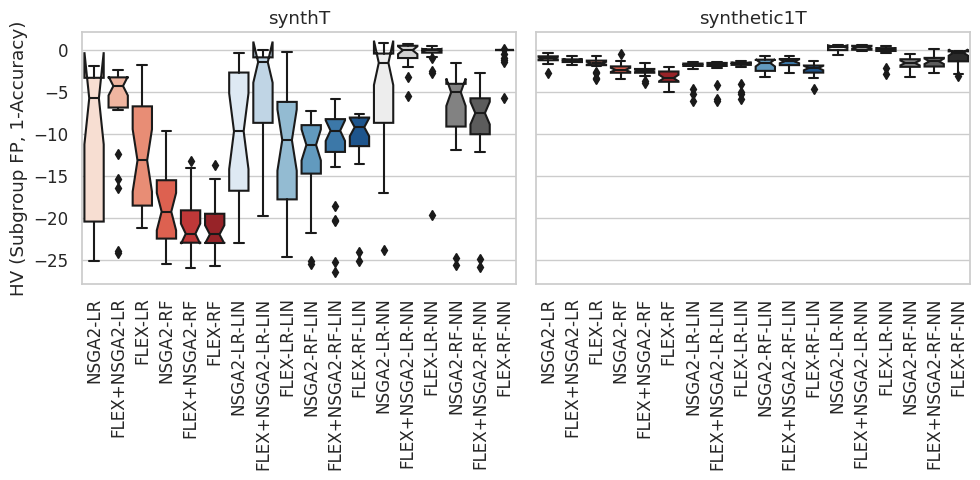

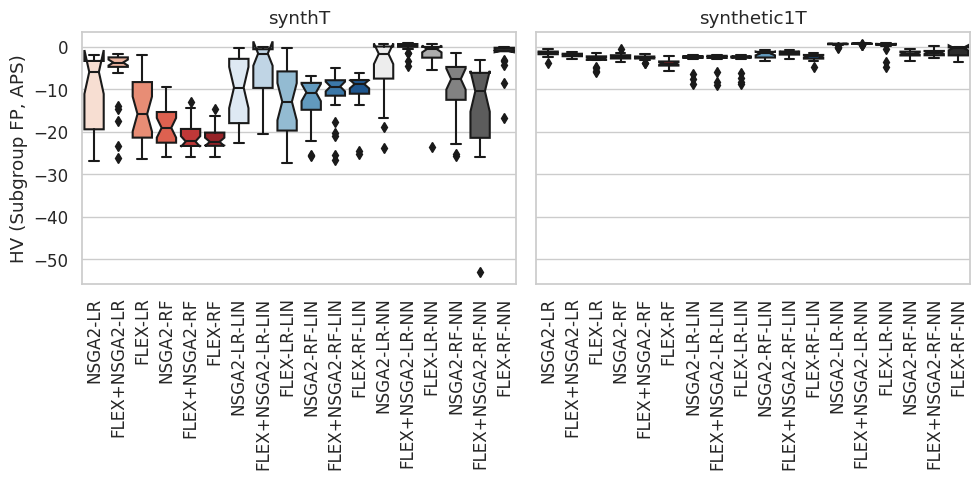

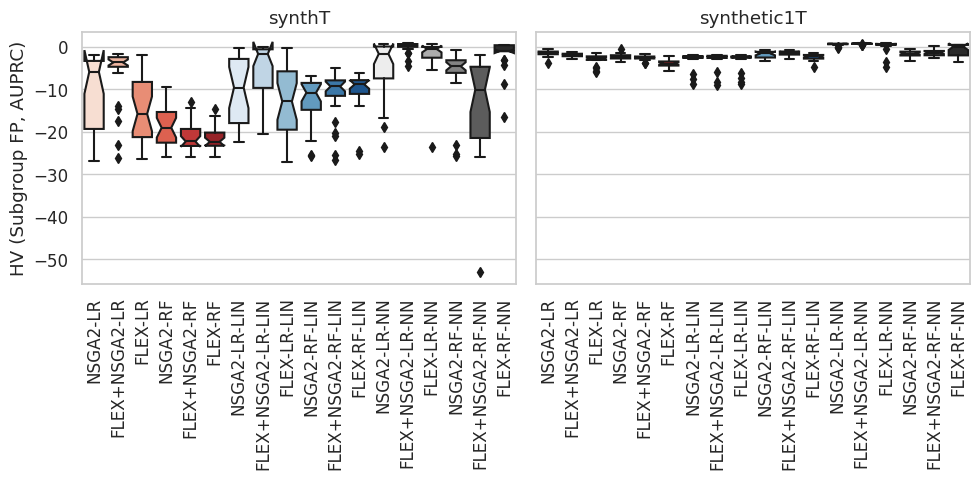

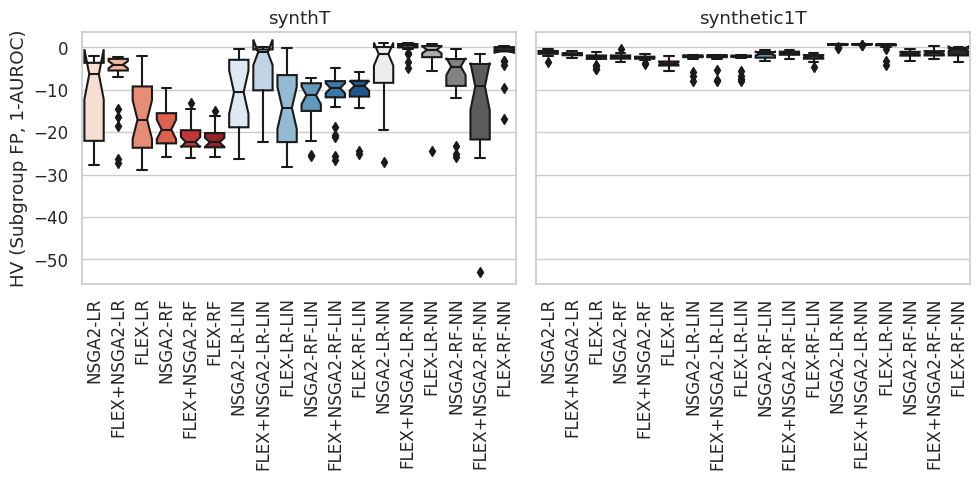

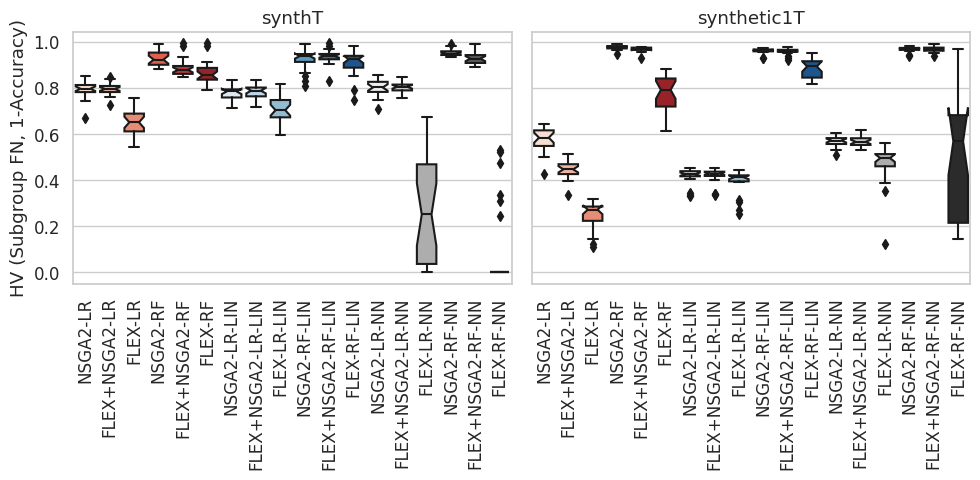

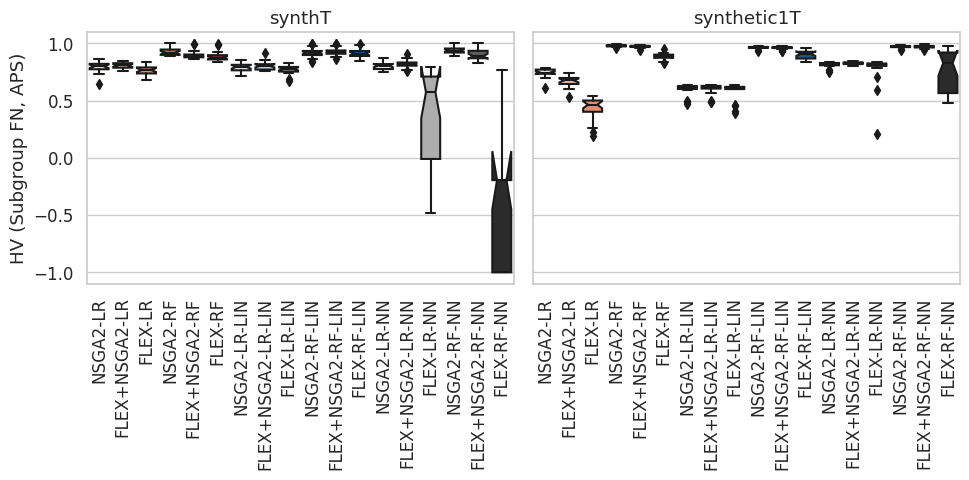

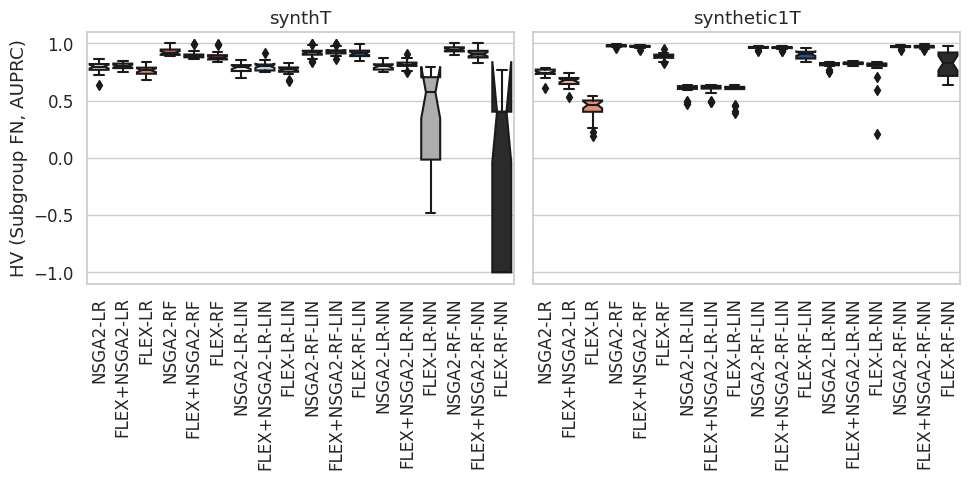

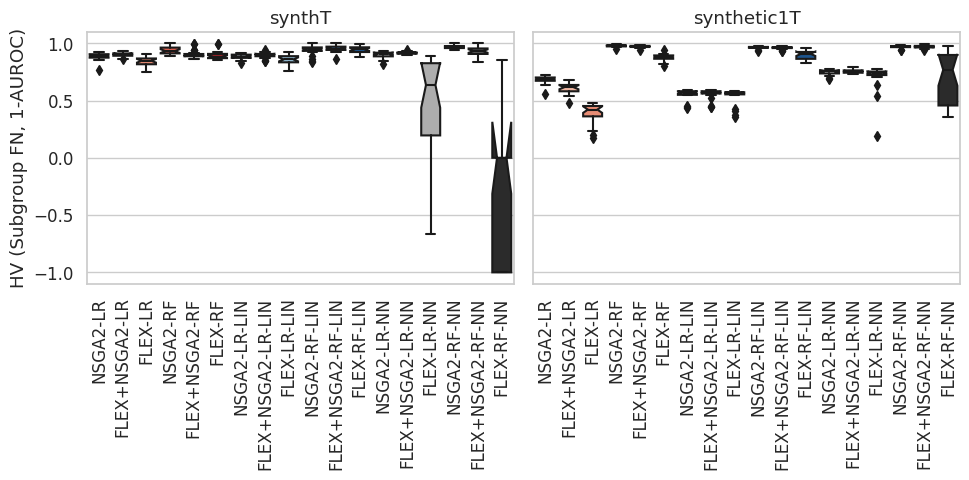

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_cols = [c for c in df_all.columns if 'hv' in c]
# train = df_train[df_train['dataset'].str.contains('ACSIncome')]
# test = df_test[df_test['dataset'].str.contains('ACSIncome')]
palette_red = sns.color_palette("Reds", 6)
palette_blue = sns.color_palette("Blues", 6)
palette_green = sns.color_palette("Grays", 6)
color_palette = palette_red + palette_blue + palette_green
#titles = {'adult':'adult-default flex','adultW':'adult-flex with weighted coin flip','adultR':'adult-random selection','adultT':'adult-flex with added test case'}
#titles = {'synthetic1':'synthetic data-default flex','synthetic1T':'synthetic data-flex with added test case', 
          #'synthetic1N':'synthetic data-flex with no coin flip', 'synthetic1W':'synthetic data-flex with weighted coin flip'}
for col in plot_cols:
    h, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)  # Set sharey=True

    i = 1
    for ax, (dataset, dfg) in zip(axes.flatten(), df_train.groupby('dataset')):
        sns.boxplot(data=dfg, x='method_nice', y=col, notch=True, order=OrderNice, palette=color_palette, ax=ax)
        ax.set_title(dataset)
        #ax.set_title(titles[dataset])
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i % 2 == 1:
            ax.set_ylabel('HV (' + y1 + ', ' + y2 + ')')
        else:
            ax.set_ylabel('')
        if (i>0):
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        else:
            ax.set_xticklabels([])
        ax.set_xlabel('')
        i += 1

    plt.tight_layout()
    plt.savefig(figdir + '/normalized_train_' + col.replace('(', '-').replace(':', '-')[:-1] + '.png', bbox_inches='tight')


#### test results

In [ ]:
plot_cols = [c for c in df_all.columns if 'hv' in c]
palette_red = sns.color_palette("Reds", 6)
palette_blue = sns.color_palette("Blues", 6)
palette_green = sns.color_palette("Grays", 6)
color_palette = palette_red + palette_blue + palette_green
for col in plot_cols:
    h = plt.figure(figsize=(15,15))
    i = 1
    for dataset,dfg in df_test.groupby('dataset'):
        ax = h.add_subplot(3,3,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette=color_palette)
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i%3 ==1:
            plt.ylabel('HV (' + y1 +', '+y2+')')
        else:
            plt.ylabel('')
        if i < 3:
            ax.set_xticklabels([])
            ax.set_xlabel('')
        else:
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    plt.savefig(figdir+'/test_'+col.replace('(','-').replace(':','-')[:-1] +'.png',
               bbox_inches='tight')

In [ ]:
plot_cols = [c for c in df_all.columns if 'hv' in c]

df_plt = df_test.melt(
    value_vars = plot_cols,
    id_vars = ['method','method_nice','dataset']
)
df_plt
sns.catplot(
    kind='box',
#     kind='strip',
    data=df_plt,
    y='method_nice',
    x='value',
    hue='method_nice',
    dodge=False,
    order=OrderNice,
    row='variable',
    col='dataset',
    facet_kws=dict(
        margin_titles=True,
#         sharey=False
    ),
#     margin_titles=True,
#     sharex=False,
    height=6
)
plt.savefig('that figure')

In [ ]:
# test figures
sns.set_style('white')
plot_cols = [c for c in df_all.columns if 'hv' in c]
plot_cols = [
    'hv(subgroup_fpr:accuracy)',
    'hv(subgroup_fnr:accuracy)' 
]

for col in plot_cols:
    h = plt.figure(figsize=(10,10))
    i = 1
    FN = '_fn_' in col
    if FN:
        order = [o for o in Order if 'fpr' not in o.lower()]
    else:
        order = [o for o in Order if 'fnr' not in o.lower()]
        
    g = sns.catplot(
        kind='box',
        data=df_test, #.loc[df_test.dataset==dataset],
        y='method',
        x=col,
#        hue='method_nice',
        dodge=False,
#         notch=True,
#         bootstrap=10000,
        order=Order,
        palette='Spectral',
        col='dataset',
#         col_wrap=2
        sharex=False,
        aspect=0.9
    )
    g.set_xlabels(hv_nice[col])
    g.set_yticklabels([method_nice[o] for o in order])
    g.set(ylabel='')
    for k,ax in g.axes_dict.items():
        ax.grid(axis='y')  #just add this
        ax.grid(axis='x')  #just add this
#     plt.ylabel('')
    savename = f'{figdir}/{col.replace(":","-").replace("(","_").replace(")","_")}.png'
    print('saving',savename)
    plt.savefig(
        savename,
        dpi=400,
        bbox_inches='tight'
    )

# get normalized scores and rankings

In [50]:
import pdb
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
# df_norms = df_test.copy()
df_norms = pd.DataFrame()

first = True
import pdb
for col in plot_cols:
    # if '_fn_' in col:
    #     matches = [o for o in Order if 'fpr' not in o.lower()]
    # else:
    #     matches = [o for o in Order if 'fnr' not in o.lower()]
        
    #df_match = df_test.loc[df_test.method.isin(matches)]
    df_match = df_test
    df_match.loc[:,'method_nice'] = df_match['method'].apply(lambda x:method_nice[x])    
    xmin = df_match[col].min()
    xmax = df_match[col].max()
    new_col = col+'_norm'
    df_match.loc[:,new_col]=df_match.groupby(['dataset'])[col].transform(
        lambda x: (x - xmin) / (xmax - xmin)
    )
    keep_cols = [new_col,'dataset','method_nice','seed']
    df_merge = df_match[keep_cols].dropna()
#     pdb.set_trace()
    if first:
        df_norms = df_merge
        first = False
    else:
        df_norms = df_norms.merge(df_merge, on=['dataset','method_nice','seed'], how='outer')
#     df_ranks.merge(df_tmp)
df_norms

plot_cols: ['hv(subgroup_fpr:accuracy)', 'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)', 'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)', 'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)']


/tmp/ipykernel_718/2409289093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match.loc[:,'method_nice'] = df_match['method'].apply(lambda x:method_nice[x])
/tmp/ipykernel_718/2409289093.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match.loc[:,new_col]=df_match.groupby(['dataset'])[col].transform(
/tmp/ipykernel_718/2409289093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,hv(subgroup_fpr:accuracy)_norm,dataset,method_nice,seed,hv(subgroup_fpr:ave_precision_score)_norm,hv(subgroup_fpr:auc_prc)_norm,hv(subgroup_fpr:auc_roc)_norm,hv(subgroup_fnr:accuracy)_norm,hv(subgroup_fnr:ave_precision_score)_norm,hv(subgroup_fnr:auc_prc)_norm,hv(subgroup_fnr:auc_roc)_norm
0,0.907632,synthetic1,FLEX+NSGA2-RF-LIN,12669,0.868682,0.860862,0.879309,0.992636,0.996089,0.994613,0.996799
1,0.911360,synthetic1,NSGA2-RF-LIN,10197,0.870293,0.862457,0.880773,0.996395,0.994532,0.993052,0.995325
2,0.930781,synthetic1,FLEX-RF,10132,0.897209,0.889133,0.906694,0.987345,0.989214,0.987766,0.991400
3,0.892204,synthetic1,FLEX-RF,29756,0.865122,0.857334,0.875630,0.967529,0.992191,0.990718,0.992969
4,0.923830,synthetic1,FLEX+NSGA2-RF-LIN,27690,0.883955,0.875997,0.894054,0.998580,0.996094,0.994619,0.997019
...,...,...,...,...,...,...,...,...,...,...,...
445,0.430220,synthetic1,FLEX+NSGA2-LR-LIN,24481,0.590377,0.584984,0.545733,0.214536,0.267891,0.267572,0.215075
446,0.845618,synthetic1,NSGA2-RF,6832,0.809139,0.801861,0.821767,0.970954,0.994649,0.993173,0.994637
447,0.916669,synthetic1,FLEX-RF-LIN,19863,0.881712,0.873772,0.891733,0.984427,0.986266,0.984805,0.988887
448,0.200042,synthetic1,FLEX-LR-LIN,13352,0.299173,0.296454,0.270105,0.175345,0.234593,0.234375,0.174386


In [51]:
#df_norms["method_nice"].value_counts()
df_norms["hv(subgroup_fnr:accuracy)_norm"]
# df_test.groupby(['method_nice','dataset'])
# df_test.groupby(['method_nice','dataset'])['hv(subgroup_fpr:auc_roc)'].mean().unstack()

# df_test.groupby(['method_nice'])['hv(subgroup_fpr:auc_roc)'].mean()

0      0.992636
1      0.996395
2      0.987345
3      0.967529
4      0.998580
         ...   
445    0.214536
446    0.970954
447    0.984427
448    0.175345
449    0.991913
Name: hv(subgroup_fnr:accuracy)_norm, Length: 450, dtype: float64

In [52]:
df_norms.groupby(['method_nice','dataset'])['hv(subgroup_fnr:accuracy)_norm'].mean().unstack()

dataset,synthetic1
method_nice,
FLEX+NSGA2-LR,0.118722
FLEX+NSGA2-LR-LIN,0.170336
FLEX+NSGA2-LR-NN,0.195799
FLEX+NSGA2-RF,0.982534
FLEX+NSGA2-RF-LIN,0.986384
FLEX+NSGA2-RF-NN,0.988769
FLEX-LR,0.094615
FLEX-LR-LIN,0.170153
FLEX-LR-NN,0.186237


In [53]:
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
df_norms = df_test.copy()

first = True
import pdb
for col in plot_cols:
    # if '_fn_' in col:
    #     matches = [o for o in Order if 'fpr' not in o.lower()]
    # else:
    #     matches = [o for o in Order if 'fnr' not in o.lower()]
        
    #df_match = df_test.loc[df_test.method.isin(matches)]
    df_match = df_test
    df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])    
    df_tmp_med = pd.DataFrame(dtype=float)
    df_tmp_med[col] = df_match.groupby(['dataset','method_nice'])[col].median()
    df_tmp = pd.DataFrame({ "rank_"+col: df_tmp_med.groupby(['dataset'])[col].rank(ascending=True) }).reset_index()
    
    print('df_tmp:',df_tmp)
#     ranks.append(df_tmp)
    if first:
        df_ranks = df_tmp
        first = False
    else:
        df_ranks = df_ranks.merge(df_tmp, how='outer',on=['dataset','method_nice'])
df_ranks

plot_cols: ['hv(subgroup_fpr:accuracy)', 'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)', 'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)', 'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)']
df_tmp:        dataset        method_nice  rank_hv(subgroup_fpr:accuracy)
0   synthetic1      FLEX+NSGA2-LR                             1.0
1   synthetic1  FLEX+NSGA2-LR-LIN                             4.0
2   synthetic1   FLEX+NSGA2-LR-NN                             8.0
3   synthetic1      FLEX+NSGA2-RF                            13.0
4   synthetic1  FLEX+NSGA2-RF-LIN                            17.0
5   synthetic1   FLEX+NSGA2-RF-NN                            18.0
6   synthetic1            FLEX-LR                             2.0
7   synthetic1        FLEX-LR-LIN                             3.0
8   synthetic1         FLEX-LR-NN                             7.0
9   synthetic1            FLEX-RF                            12.0
10  

/tmp/ipykernel_718/3536045045.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])
/tmp/ipykernel_718/3536045045.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])
/tmp/ipykernel_718/3536045045.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,dataset,method_nice,rank_hv(subgroup_fpr:accuracy),rank_hv(subgroup_fpr:ave_precision_score),rank_hv(subgroup_fpr:auc_prc),rank_hv(subgroup_fpr:auc_roc),rank_hv(subgroup_fnr:accuracy),rank_hv(subgroup_fnr:ave_precision_score),rank_hv(subgroup_fnr:auc_prc),rank_hv(subgroup_fnr:auc_roc)
0,synthetic1,FLEX+NSGA2-LR,1.0,1.0,1.0,1.0,2.0,9.0,9.0,5.0
1,synthetic1,FLEX+NSGA2-LR-LIN,4.0,4.0,4.0,4.0,5.0,1.0,1.0,3.0
2,synthetic1,FLEX+NSGA2-LR-NN,8.0,9.0,9.0,8.0,8.0,7.0,7.0,9.0
3,synthetic1,FLEX+NSGA2-RF,13.0,12.0,12.0,12.0,13.0,15.0,15.0,15.0
4,synthetic1,FLEX+NSGA2-RF-LIN,17.0,18.0,18.0,18.0,17.0,13.0,13.0,13.0
5,synthetic1,FLEX+NSGA2-RF-NN,18.0,17.0,17.0,17.0,18.0,16.0,16.0,16.0
6,synthetic1,FLEX-LR,2.0,2.0,2.0,2.0,1.0,5.0,5.0,2.0
7,synthetic1,FLEX-LR-LIN,3.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0
8,synthetic1,FLEX-LR-NN,7.0,8.0,8.0,7.0,6.0,8.0,8.0,7.0
9,synthetic1,FLEX-RF,12.0,13.0,13.0,13.0,11.0,11.0,11.0,11.0


In [21]:
df_ranks

,dataset,method_nice,rank_hv(subgroup_fpr:accuracy),rank_hv(subgroup_fpr:ave_precision_score),rank_hv(subgroup_fpr:auc_prc),rank_hv(subgroup_fpr:auc_roc),rank_hv(subgroup_fnr:accuracy),rank_hv(subgroup_fnr:ave_precision_score),rank_hv(subgroup_fnr:auc_prc),rank_hv(subgroup_fnr:auc_roc)
0,adult,FOMO-FLEX-LR,1.0,1.0,1.0,1.0,6.0,6.0,6.0,5.0
1,adult,FOMO-FLEX-LR-LIN,2.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0
2,adult,FOMO-FLEX-LR-NN,6.0,6.0,6.0,6.0,2.0,4.0,4.0,1.0
3,adult,FOMO-FLEX-XGB,8.0,7.0,7.0,8.0,12.0,12.0,12.0,11.0
4,adult,FOMO-FLEX-XGB-LIN,5.0,5.0,5.0,5.0,7.0,8.0,8.0,7.0
5,adult,FOMO-FLEX-XGB-NN,12.0,12.0,12.0,12.0,11.0,10.0,10.0,12.0
6,adult,FOMO-LR,10.0,10.0,10.0,10.0,5.0,5.0,5.0,6.0
7,adult,FOMO-LR-Lin,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0
8,adult,FOMO-LR-NN,7.0,8.0,8.0,7.0,4.0,3.0,3.0,2.0
9,adult,FOMO-XGB,9.0,9.0,9.0,9.0,10.0,11.0,11.0,9.0


In [54]:
!pip install statannotations

14629.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [34]:
!pip show statannotations

Name: statannotations
Version: 0.6.0
Summary: add statistical significance or custom annotations on seaborn plots. Based on statannot 0.2.3
Home-page: https://github.com/trevismd/statannotations
Author: 
Author-email: 
License: MIT License
Location: /home/shakiba/flex/flex/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas, scipy, seaborn
Required-by: 


In [55]:
annotator.configure?

Object `annotator.configure` not found.


('NSGA2-LR', 'FLEX+NSGA2-LR')
('NSGA2-LR', 'FLEX-LR')
('NSGA2-LR', 'NSGA2-RF')
('NSGA2-LR', 'FLEX+NSGA2-RF')
('NSGA2-LR', 'FLEX-RF')
('NSGA2-LR', 'NSGA2-LR-LIN')
('NSGA2-LR', 'FLEX+NSGA2-LR-LIN')
('NSGA2-LR', 'FLEX-LR-LIN')
('NSGA2-LR', 'NSGA2-RF-LIN')
('NSGA2-LR', 'FLEX+NSGA2-RF-LIN')
('NSGA2-LR', 'FLEX-RF-LIN')
('NSGA2-LR', 'NSGA2-LR-NN')
('NSGA2-LR', 'FLEX+NSGA2-LR-NN')
('NSGA2-LR', 'FLEX-LR-NN')
('NSGA2-LR', 'NSGA2-RF-NN')
('NSGA2-LR', 'FLEX+NSGA2-RF-NN')
('NSGA2-LR', 'FLEX-RF-NN')
('FLEX+NSGA2-LR', 'FLEX-LR')
('FLEX+NSGA2-LR', 'NSGA2-RF')
('FLEX+NSGA2-LR', 'FLEX+NSGA2-RF')
('FLEX+NSGA2-LR', 'FLEX-RF')
('FLEX+NSGA2-LR', 'NSGA2-LR-LIN')
('FLEX+NSGA2-LR', 'FLEX+NSGA2-LR-LIN')
('FLEX+NSGA2-LR', 'FLEX-LR-LIN')
('FLEX+NSGA2-LR', 'NSGA2-RF-LIN')
('FLEX+NSGA2-LR', 'FLEX+NSGA2-RF-LIN')
('FLEX+NSGA2-LR', 'FLEX-RF-LIN')
('FLEX+NSGA2-LR', 'NSGA2-LR-NN')
('FLEX+NSGA2-LR', 'FLEX+NSGA2-LR-NN')
('FLEX+NSGA2-LR', 'FLEX-LR-NN')
('FLEX+NSGA2-LR', 'NSGA2-RF-NN')
('FLEX+NSGA2-LR', 'FLEX+NSGA2-RF-NN')


FileNotFoundError: [Errno 2] No such file or directory: 'figs/hypervolume_comparison/rankings.png'

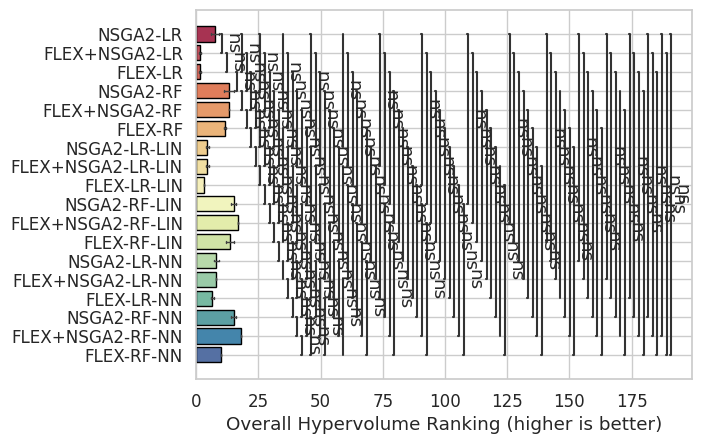

In [56]:
df_plt = df_ranks.melt(
    id_vars = [
        'method_nice',
        
    ],
    value_vars = [
        'rank_hv(subgroup_fpr:accuracy)',
        'rank_hv(subgroup_fnr:accuracy)'
    ]
)
# df_plt.method_nice = df_plt.method_nice.astype('category')
shared_args = dict(
    data=df_plt.drop(columns='variable'),
    y='method_nice',
    x='value',
    order=OrderNice,
)
ax = sns.barplot(
    **shared_args,
    palette='Spectral',
    edgecolor=(0,0,0),
    capsize=0.1,
    errwidth=1,
    fill=True,
)
# ax.set_xticklabels(
# #     ax.get_xticklabels(),
#     [x._text for x in ax.get_xticklabels()],
#     rotation=90
# )
ax.set_xlabel('Overall Hypervolume Ranking (higher is better)')
plt.ylabel('')
################################################################################
# add stat annotations
from statannotations.Annotator import Annotator
from itertools import combinations
pairs = list(combinations(OrderNice, 2) )
for p in pairs:
    print(p)
#pairs = [
#     ('GerryFair-LR', 'GerryFair-XGB'),
#    ('GerryFair-LR', 'FOMO-LR'),
#     ('GerryFair-LR', 'FOMO-LR-Lin'),
#     ('GerryFair-LR', 'FOMO-LR-NN'),
#     ('GerryFair-LR', 'FOMO-XGB'),
#    ('GerryFair-LR', 'FOMO-XGB-Lin'),
#     ('GerryFair-LR', 'FOMO-XGB-NN'),
#     ('GerryFair-XGB', 'FOMO-LR'),
#     ('GerryFair-XGB', 'FOMO-LR-Lin'),
#     ('GerryFair-XGB', 'FOMO-LR-NN'),
#    ('GerryFair-XGB', 'FOMO-XGB'),
#     ('GerryFair-XGB', 'FOMO-XGB-Lin'),
#     ('GerryFair-XGB', 'FOMO-XGB-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
    
#    ('FOMO-LR', 'FOMO-LR-NN'),
#    ('FOMO-LR', 'FOMO-XGB'),
#     ('FOMO-LR', 'FOMO-XGB-Lin'),
#     ('FOMO-LR', 'FOMO-XGB-NN'),
#     ('FOMO-LR-Lin', 'FOMO-LR-NN'),
#     ('FOMO-LR-Lin', 'FOMO-XGB'),
#     ('FOMO-LR-Lin', 'FOMO-XGB-Lin'),
#     ('FOMO-LR-Lin', 'FOMO-XGB-NN'),
#     ('FOMO-LR-NN', 'FOMO-XGB'),
#     ('FOMO-LR-NN', 'FOMO-XGB-Lin'),
#     ('FOMO-LR-NN', 'FOMO-XGB-NN'),
#    ('FOMO-XGB', 'FOMO-XGB-Lin'),
#    ('FOMO-XGB', 'FOMO-XGB-NN'),
#     ('FOMO-XGB-Lin', 'FOMO-XGB-NN')
#]
annotator = Annotator(
    ax,
    pairs,
    orient='h',
    **shared_args
)
annotator.configure(
    test='Mann-Whitney', 
    text_format='star', 
    loc='inside',
    comparisons_correction='bonferroni'
)
annotator.apply_and_annotate()
ax.grid(True)
plt.savefig('figs/hypervolume_comparison/rankings.', dpi=400, bbox_inches='tight')